# Import Libraries

In [336]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

In [337]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score,recall_score,precision_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

# Load Data

In [338]:
df=pd.read_csv('data.csv',sep=";")
df.head(100)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.02,0,1,0,7,0.06,188,2,...,20,756,2549,9,7,19.0,0,0.0,1,1
1,1021,1,0.05,1,0,1,53,0.07,136,3,...,905,1988,2631,17,3,7.0,1,1.0,0,2
2,563,1,0.05,1,2,1,41,0.09,145,5,...,1263,1716,2603,11,2,9.0,1,1.0,0,2
3,615,1,2.05,0,0,0,10,0.08,131,6,...,1216,1786,2769,16,8,11.0,1,0.0,0,2
4,1821,1,1.02,0,13,1,44,NaN,141,2,...,1208,1212,1411,8,2,NaN,1,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1137,1,1.00,0,18,0,7,1.00,196,3,...,942,1179,3616,13,5,12.0,1,1.0,1,3
96,1355,0,2.03,0,10,1,23,0.02,132,5,...,651,891,880,19,4,8.0,1,1.0,0,0
97,1665,1,0.05,0,3,1,60,0.02,194,6,...,1572,1684,1601,18,17,14.0,1,0.0,0,2
98,657,0,2.05,0,0,0,37,0.07,141,2,...,476,961,1412,14,3,18.0,0,1.0,0,0


# Exploratory Data Analysis

In [339]:
df.shape

(2000, 21)

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          1985 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      1989 non-null   float64
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [341]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1985.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1989.000000,2000.000000,1986.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.078325,0.509500,4.309500,0.521500,32.046500,0.097723,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,10.999497,0.761500,0.503021,0.507000,1.500000
std,439.418206,0.5001,0.843637,0.500035,4.341444,0.499662,18.145715,0.214906,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.465964,0.426273,0.500117,0.500076,1.118314
min,501.000000,0.0000,0.050000,0.000000,0.000000,0.000000,2.000000,0.010000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.070000,0.000000,1.000000,0.000000,16.000000,0.020000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.050000,1.000000,3.000000,1.000000,32.000000,0.050000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.020000,1.000000,7.000000,1.000000,48.000000,0.080000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [342]:
df.isnull().sum()

battery_power     0
blue              0
clock_speed       0
dual_sim          0
fc                0
four_g            0
int_memory        0
m_dep            15
mobile_wt         0
n_cores           0
pc                0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time        11
three_g           0
touch_screen     14
wifi              0
price_range       0
dtype: int64

## Visualize Numerical Features

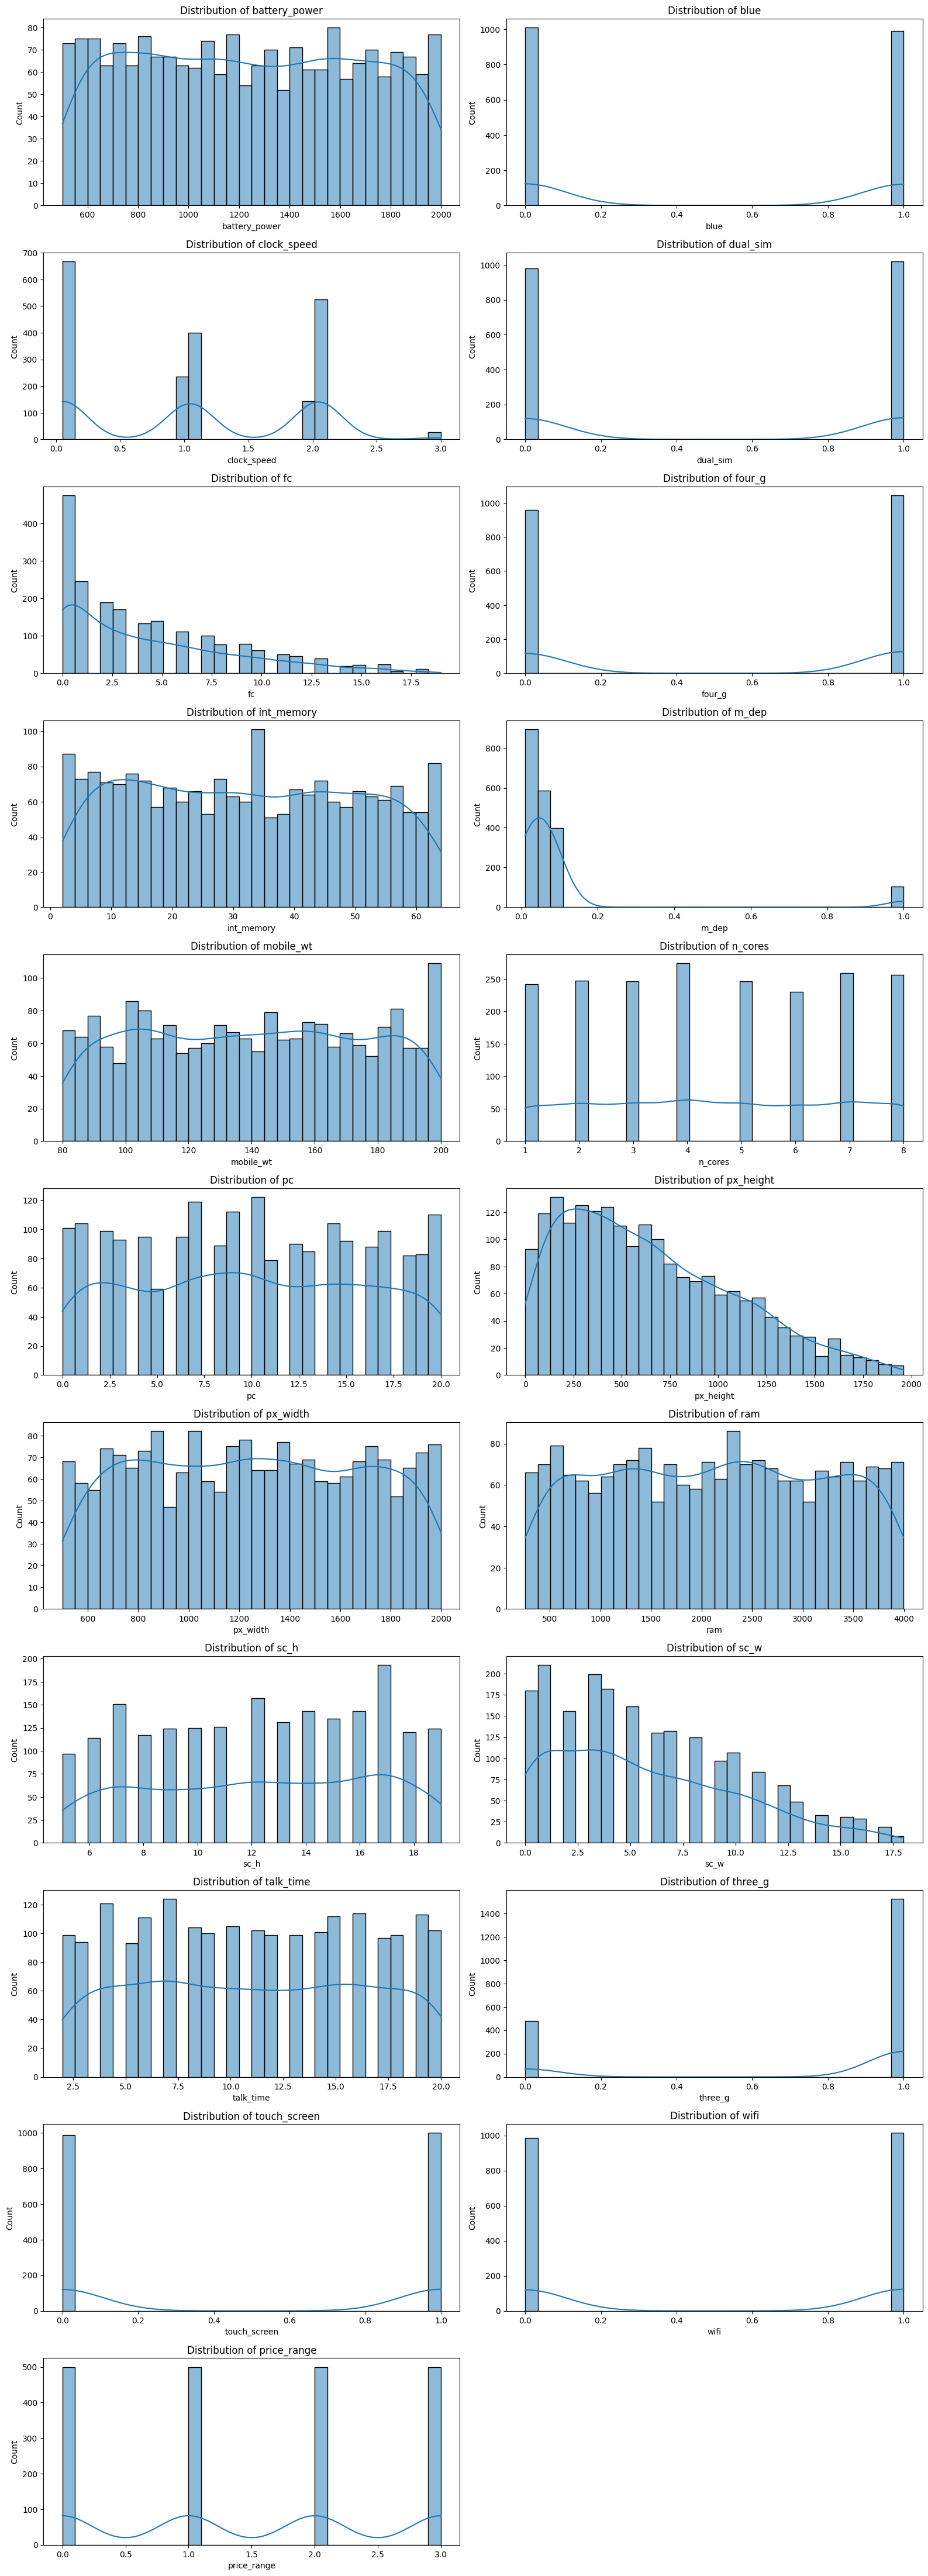

In [343]:
numerical_cols=df.select_dtypes(include=['int64','float64'])

n=len(numerical_cols)
columns=2
rows=(n+1)//2
plt.figure(figsize=(16,4*rows))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, columns, i)  # Corrected
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

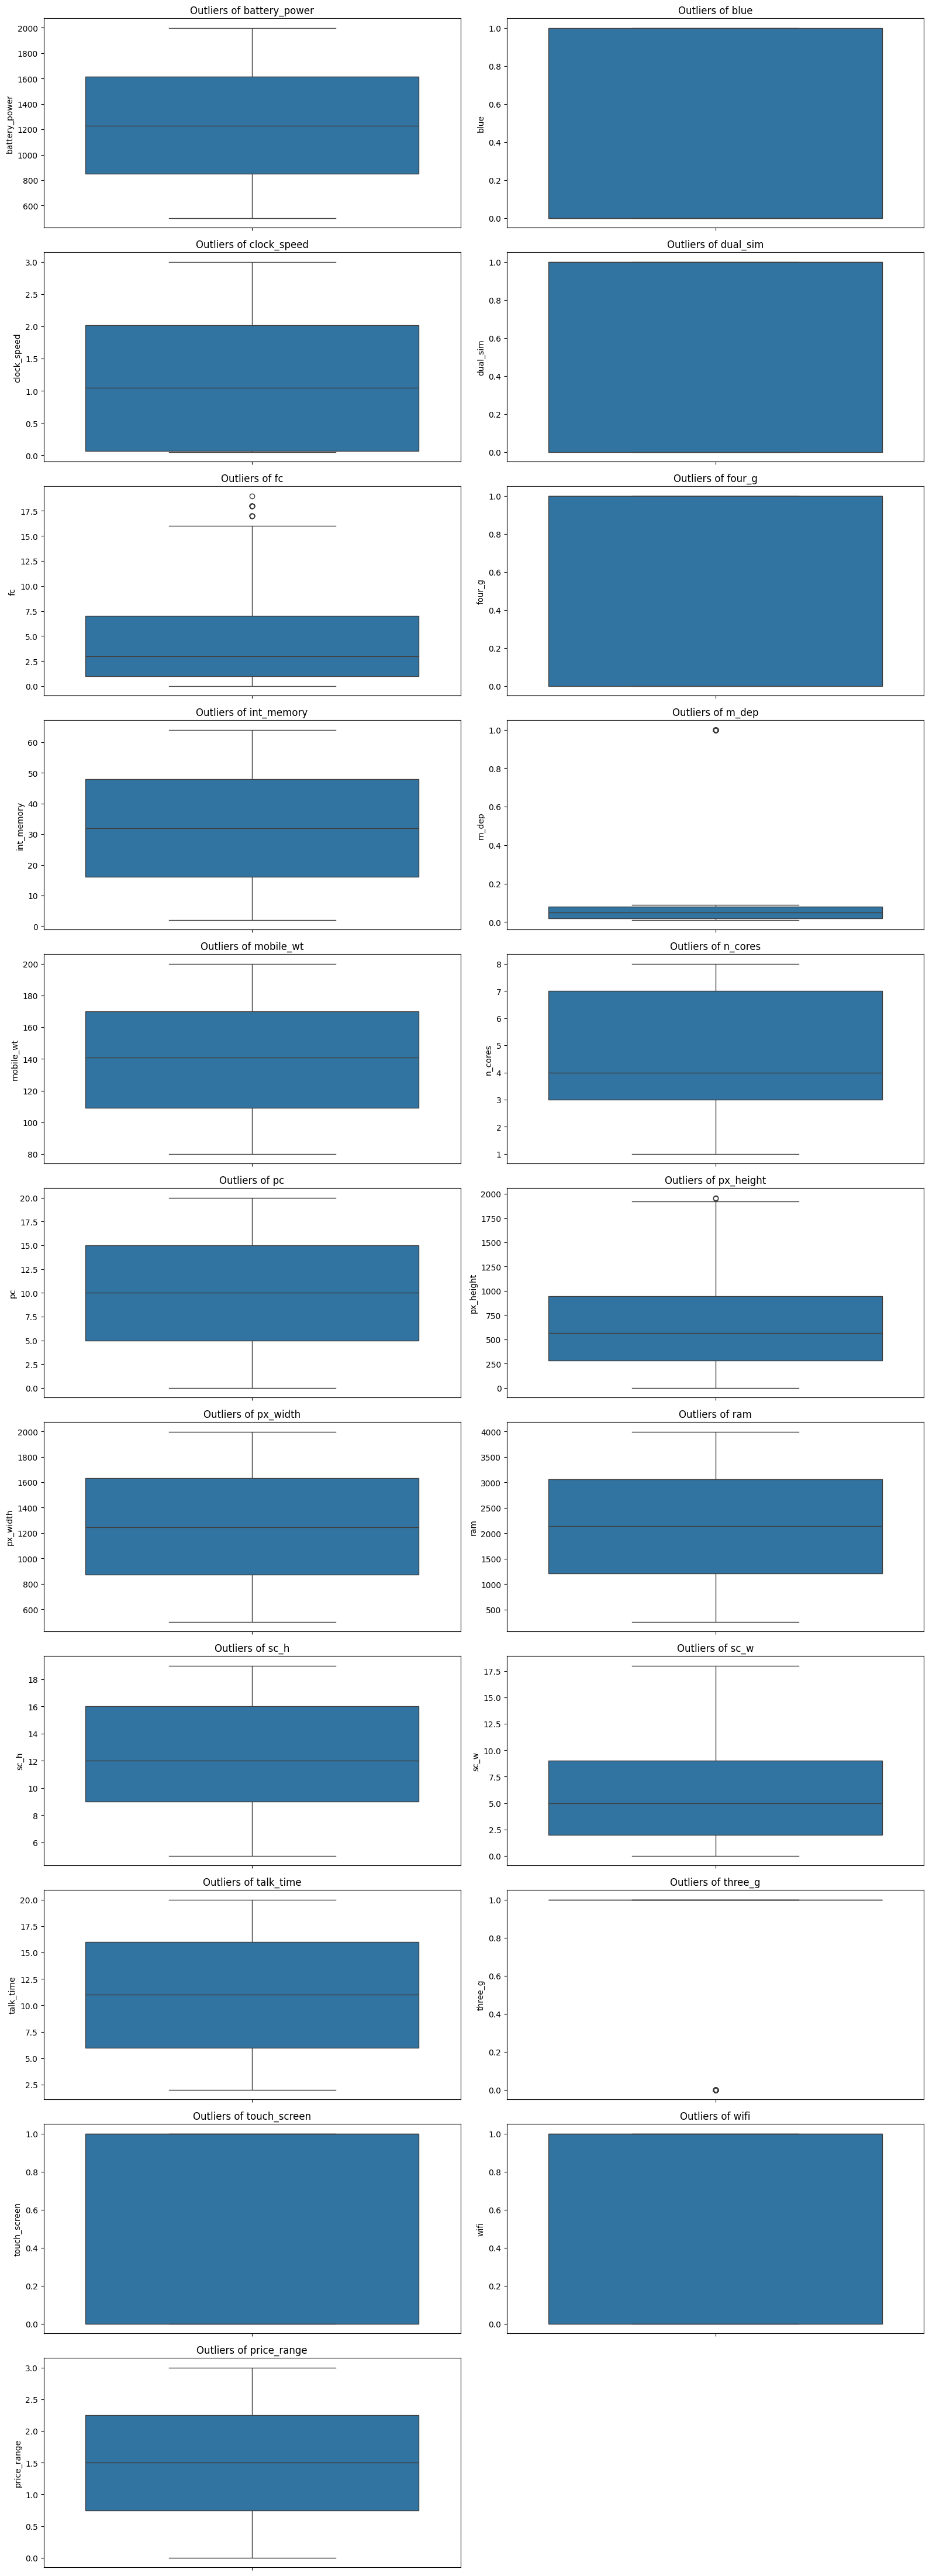

In [344]:
numerical_cols=df.select_dtypes(include=['int64','float64'])
n=len(numerical_cols)
columns=2
rows=(n+1)//2
plt.figure(figsize=(16,4*rows))

for i, col in enumerate(numerical_cols,1):
    plt.subplot(rows,columns,i)
    sns.boxplot(y=df[col])
    plt.title(f'Outliers of {col}')

plt.tight_layout()
plt.show()

In [345]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

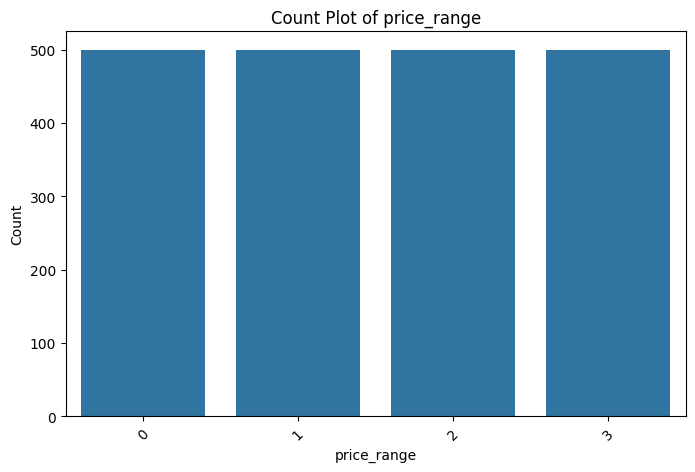

In [346]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='price_range')

plt.title('Count Plot of price_range')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

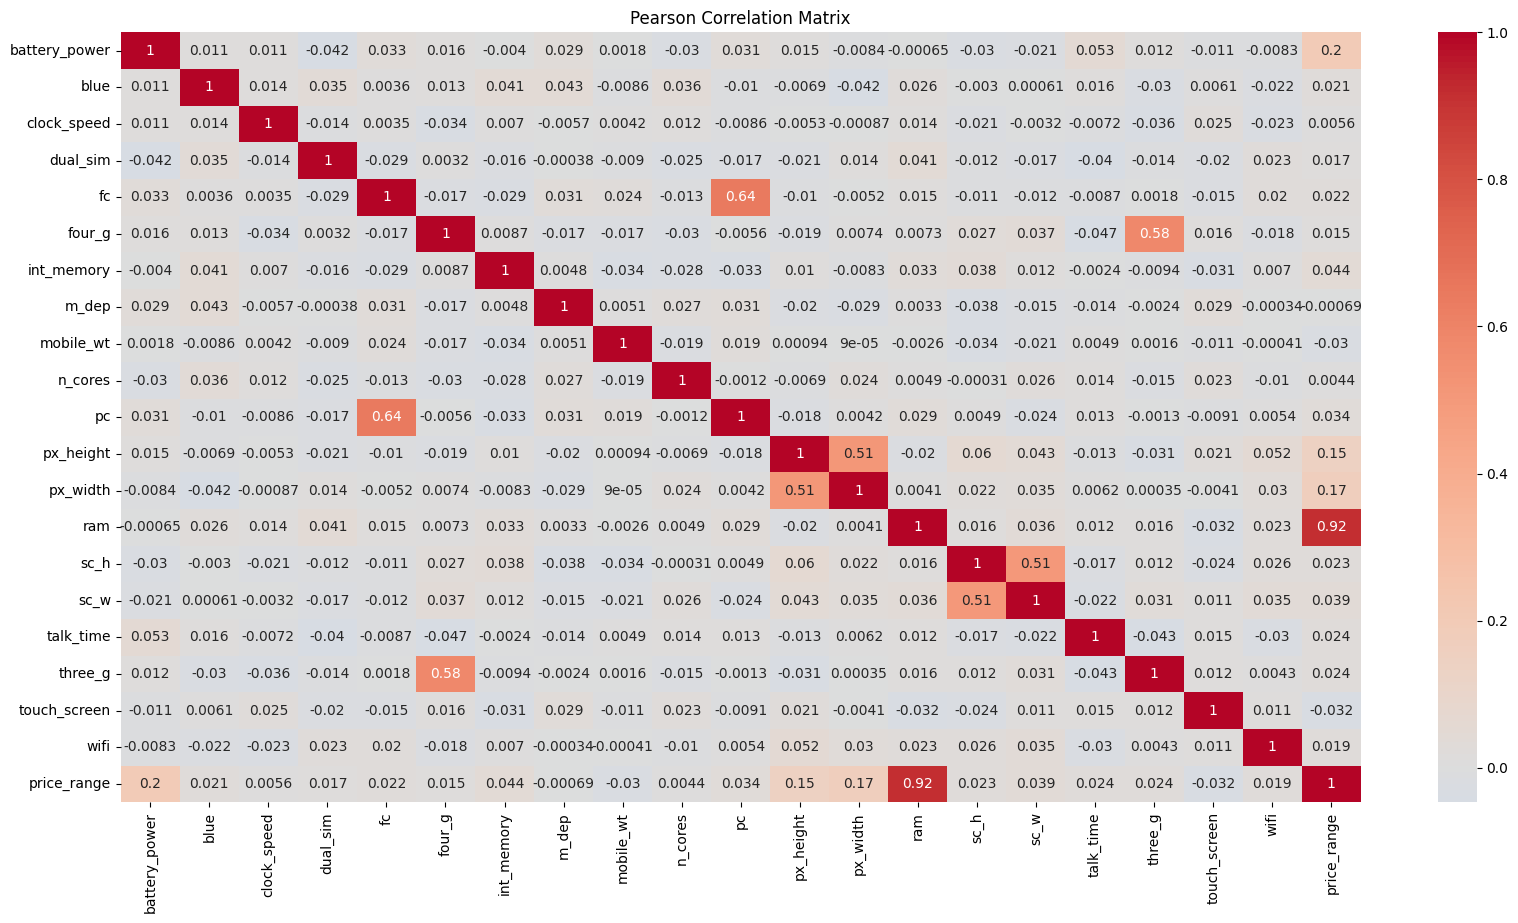

In [347]:
corr_matrix = df.corr(numeric_only=True, method='pearson')

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Matrix')
plt.show()

# Data Cleaning

## Null Handling

In [348]:
print(df.isnull().sum())

battery_power     0
blue              0
clock_speed       0
dual_sim          0
fc                0
four_g            0
int_memory        0
m_dep            15
mobile_wt         0
n_cores           0
pc                0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time        11
three_g           0
touch_screen     14
wifi              0
price_range       0
dtype: int64


In [349]:
print(df[['m_dep','talk_time','touch_screen']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   m_dep         1985 non-null   float64
 1   talk_time     1989 non-null   float64
 2   touch_screen  1986 non-null   float64
dtypes: float64(3)
memory usage: 47.0 KB
None


In [350]:
col_to_fill=['talk_time','touch_screen']
df[col_to_fill]=df[col_to_fill].fillna(df[col_to_fill].median())

df['m_dep']=df['m_dep'].fillna(df['m_dep'].mode()[0])

In [351]:
print(df[['m_dep','talk_time','touch_screen']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   m_dep         2000 non-null   float64
 1   talk_time     2000 non-null   float64
 2   touch_screen  2000 non-null   float64
dtypes: float64(3)
memory usage: 47.0 KB
None


## Outliers Removing

In [352]:
def remove_outliers_iqr(data, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_clean = remove_outliers_iqr(df, ['three_g','fc','px_height','m_dep'])
df=df_clean.copy()

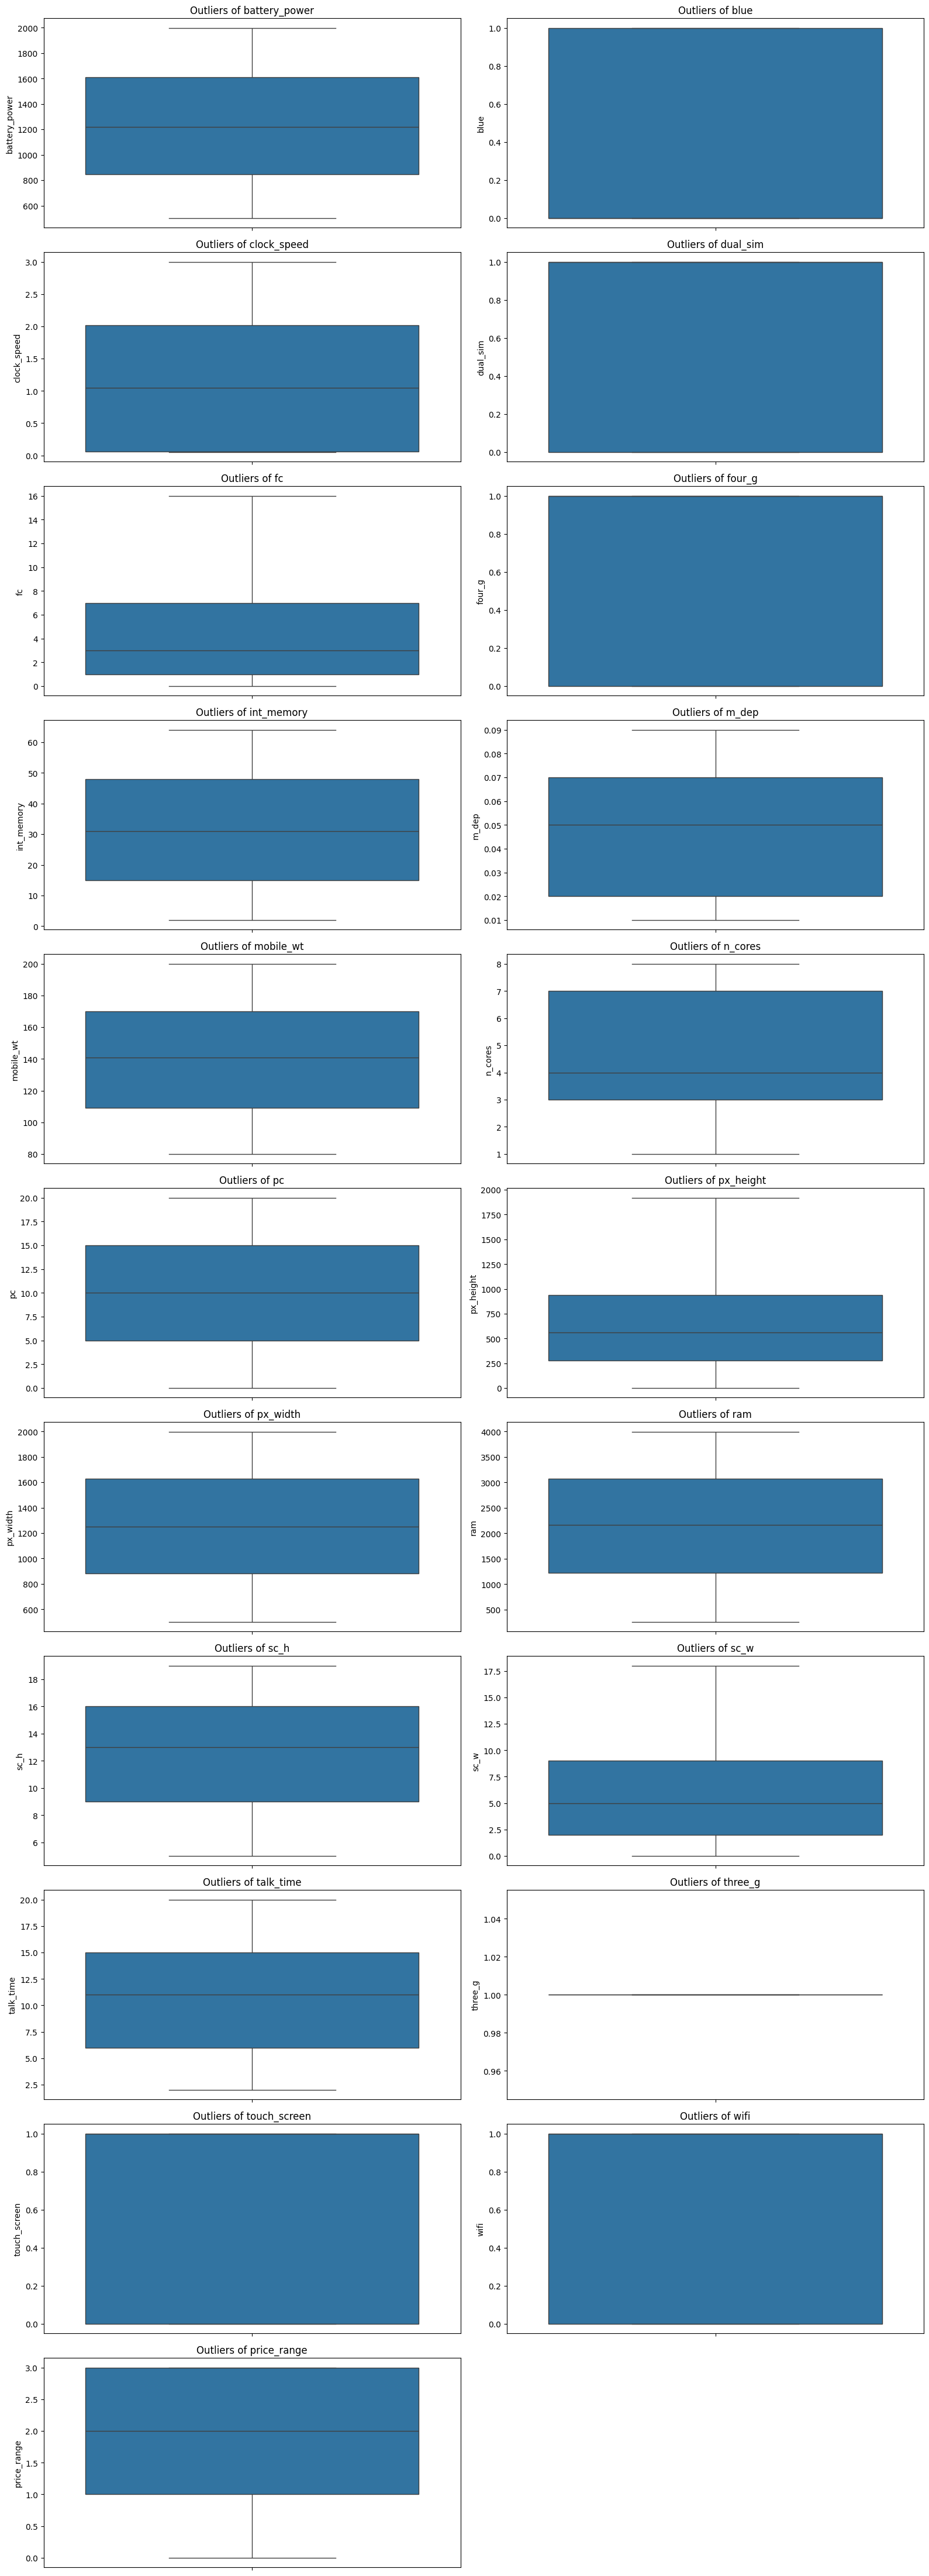

In [353]:
numerical_cols=df.select_dtypes(include=['int64','float64'])
n=len(numerical_cols)
columns=2
rows=(n+1)//2
plt.figure(figsize=(16,4*rows))

for i, col in enumerate(numerical_cols,1):
    plt.subplot(rows,columns,i)
    sns.boxplot(y=df[col])
    plt.title(f'Outliers of {col}')

plt.tight_layout()
plt.show()

# Data Preprocessing

## Data Split

In [354]:
X = df.drop("price_range", axis=1)
y = df["price_range"]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [355]:
print(X_train.shape)
print(y_train.shape)

(1141, 20)
(1141,)


## Encoding

In [356]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# KNN Model

## Class KNN

In [357]:
class K_Nearest_Neighbors_Classifier:
    
    def __init__(self, K=5):
        self.K = K

    def fit(self, X_train, y_train):
        self.X_train = X_train.to_numpy()
        self.y_train = y_train.to_numpy()

        self.m, self.n = self.X_train.shape
        self.classes_ = np.unique(self.y_train)

    def euclidean(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def find_neighbors(self, x):
        distances = np.zeros(self.m)

        for i in range(self.m):
            distances[i] = self.euclidean(x, self.X_train[i])

        idx = np.argsort(distances)
        return self.y_train[idx][:self.K]

    def predict(self, X_test):
        X_test = X_test.to_numpy()
        y_pred = np.zeros(X_test.shape[0])

        for i, x in enumerate(X_test):
            neighbors = self.find_neighbors(x)
            y_pred[i] = mode(neighbors, keepdims=True)[0][0]

        return y_pred

    def predict_proba(self, X_test):
        X_test = X_test.to_numpy()
        proba = []

        for x in X_test:
            neighbors = self.find_neighbors(x)
            probs = np.zeros(len(self.classes_))

            for idx, cls in enumerate(self.classes_):
                probs[idx] = np.sum(neighbors == cls) / self.K

            proba.append(probs)

        return np.array(proba)

## Model Training and Prediction

In [358]:
model_KNN = K_Nearest_Neighbors_Classifier(K=5)
model_KNN.fit(X_train, y_train)

y_pred = model_KNN.predict(X_test)
y_proba = model_KNN.predict_proba(X_test)

# Evaluation

In [359]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, y_proba, multi_class='ovr')

print(f"Accuracy  : {accuracy * 100:.2f}%")
print(f"Precision : {precision * 100:.2f}%")
print(f"Recall    : {recall * 100:.2f}%")
print(f"F1 Score  : {f1 * 100:.2f}%")
print(f"ROC AUC   : {auc * 100:.2f}%")

Accuracy  : 90.56%
Precision : 90.71%
Recall    : 90.56%
F1 Score  : 90.53%
ROC AUC   : 99.23%


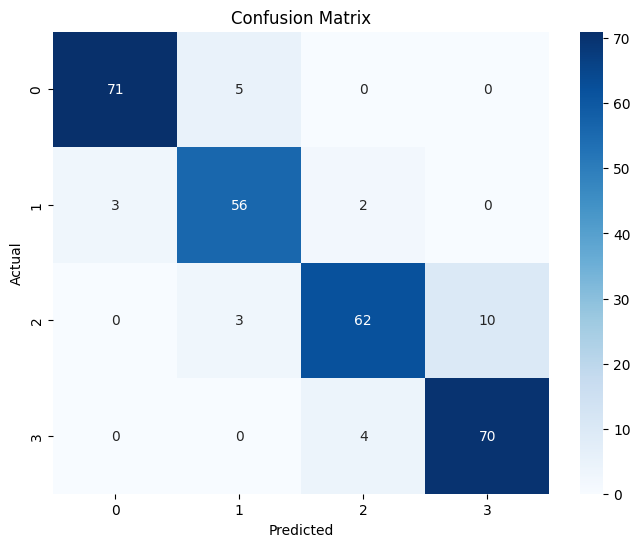

In [360]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=model_KNN.classes_,
    yticklabels=model_KNN.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Comparison with sklearn

In [361]:
model_nn=KNeighborsClassifier(n_neighbors=5)
model_nn.fit(X_train,y_train)
y_pred=model_nn.predict(X_test)

In [362]:
def evaluate_model(model, X, y, dataset_name="Dataset"):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)
    
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    auc = roc_auc_score(y, y_proba, multi_class='ovr')
    
    print(f"\n===== {dataset_name} Evaluation =====")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")
    print(f"ROC AUC: {auc * 100:.2f}%")


### Train Set Evaluation

In [363]:
evaluate_model(model_nn, X_train, y_train, "Train Set")


===== Train Set Evaluation =====
Accuracy: 95.27%
Precision: 95.28%
Recall: 95.27%
F1 Score: 95.26%
ROC AUC: 99.68%


### Test Set Evaluation

In [364]:
evaluate_model(model_nn, X_test, y_test, "Test Set")


===== Test Set Evaluation =====
Accuracy: 90.56%
Precision: 90.71%
Recall: 90.56%
F1 Score: 90.53%
ROC AUC: 99.23%


# Conclusion

<p style="text-align: justify;">
    <strong>Kesimpulan:</strong><br>
    Model <em>K-Nearest Neighbors (KNN)</em> mampu melakukan prediksi dengan baik pada data uji, 
    yang dibuktikan melalui rata-rata nilai <em>evaluation metrics</em> di kisaran <strong>~90%</strong>. 
    Selain itu, model KNN yang dibangun dari <em>scratch</em> telah diverifikasi kebenarannya dengan 
    membandingkan hasil evaluasinya terhadap implementasi dari library <em>scikit-learn</em>, 
    dan diperoleh nilai <em>evaluation metrics</em> yang sama. 
    Untuk mengatasi potensi <em>overfitting</em>, dilakukan perbandingan evaluasi antara data latih dan data uji, 
    di mana performa model pada data uji berada sekitar <strong>~5%</strong> di bawah data latih, 
    yang masih tergolong wajar. 
    Tingginya nilai <em>evaluation metrics</em> ini kemungkinan dipengaruhi oleh jumlah dataset 
    yang tidak terlalu besar serta distribusi label yang seimbang pada keempat kategori.
</p>
